# Виды распределений

Загрузить таблицу и построить график распределений. Найти нормальное распределение.

In [18]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns

%matplotlib inline

Таблица цен на дома в Бостоне

Основные значения:

* CRIM: This is the per capita crime rate by town
* ZN: This is the proportion of residential land zoned for lots larger than 25,000 sq.ft.
* INDUS: This is the proportion of non-retail business acres per town.
* CHAS: This is the Charles River dummy variable (this is equal to 1 if tract bounds river; 0 otherwise)
* NOX: This is the nitric oxides concentration (parts per 10 million)
* RM: This is the average number of rooms per dwelling
* AGE: This is the proportion of owner-occupied units built prior to 1940
* DIS: This is the weighted distances to five Boston employment centers
* RAD: This is the index of accessibility to radial highways
* TAX: This is the full-value property-tax rate per 10,000 dollars
* PTRATIO: This is the pupil-teacher ratio by town
* B: This is calculated as 1000(Bk — 0.63)², where Bk is the proportion of people of African American descent by town
* LSTAT: This is the percentage lower status of the population
* MEDV: This is the median value of owner-occupied homes in 1000 dollars

In [19]:
url = 'http://yustiks.ru/housing.csv'
s = requests.get(url).content
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv(io.StringIO(s.decode('utf-8')), delim_whitespace = True, names = names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Нарисовать частотные графики для всех значений. Можете ли вы найти следующие распределения в данных графиках?

1.   Нормальное
2.   Равномерное
3.   Биноминальное
4.   Бернулли
5.   Геометрическое
6.   Логнормальное

Виды распределений для каждого из параметров смотрим по главной диагонали графика ниже:

* CRIM - Логнормальное распределение 
* ZN - Геометрическое распределение 
* INDUS - Биномиальное распределение
* CHAS - Распределение Бернулли 
* NOX - Геометрическое распределение 
* RM - Нормальное распределение
* AGE - Биномиальное распределение
* DIS - Геометрическое распределение
* RAD - Биномиальное распределение
* TAX - Биномиальное распределение
* PTRATIO - Биномиальное распределение
* B - Биномиальное распределение
* LSTAT - Геометрическое распределение
* MEDV - Нормальное распределение

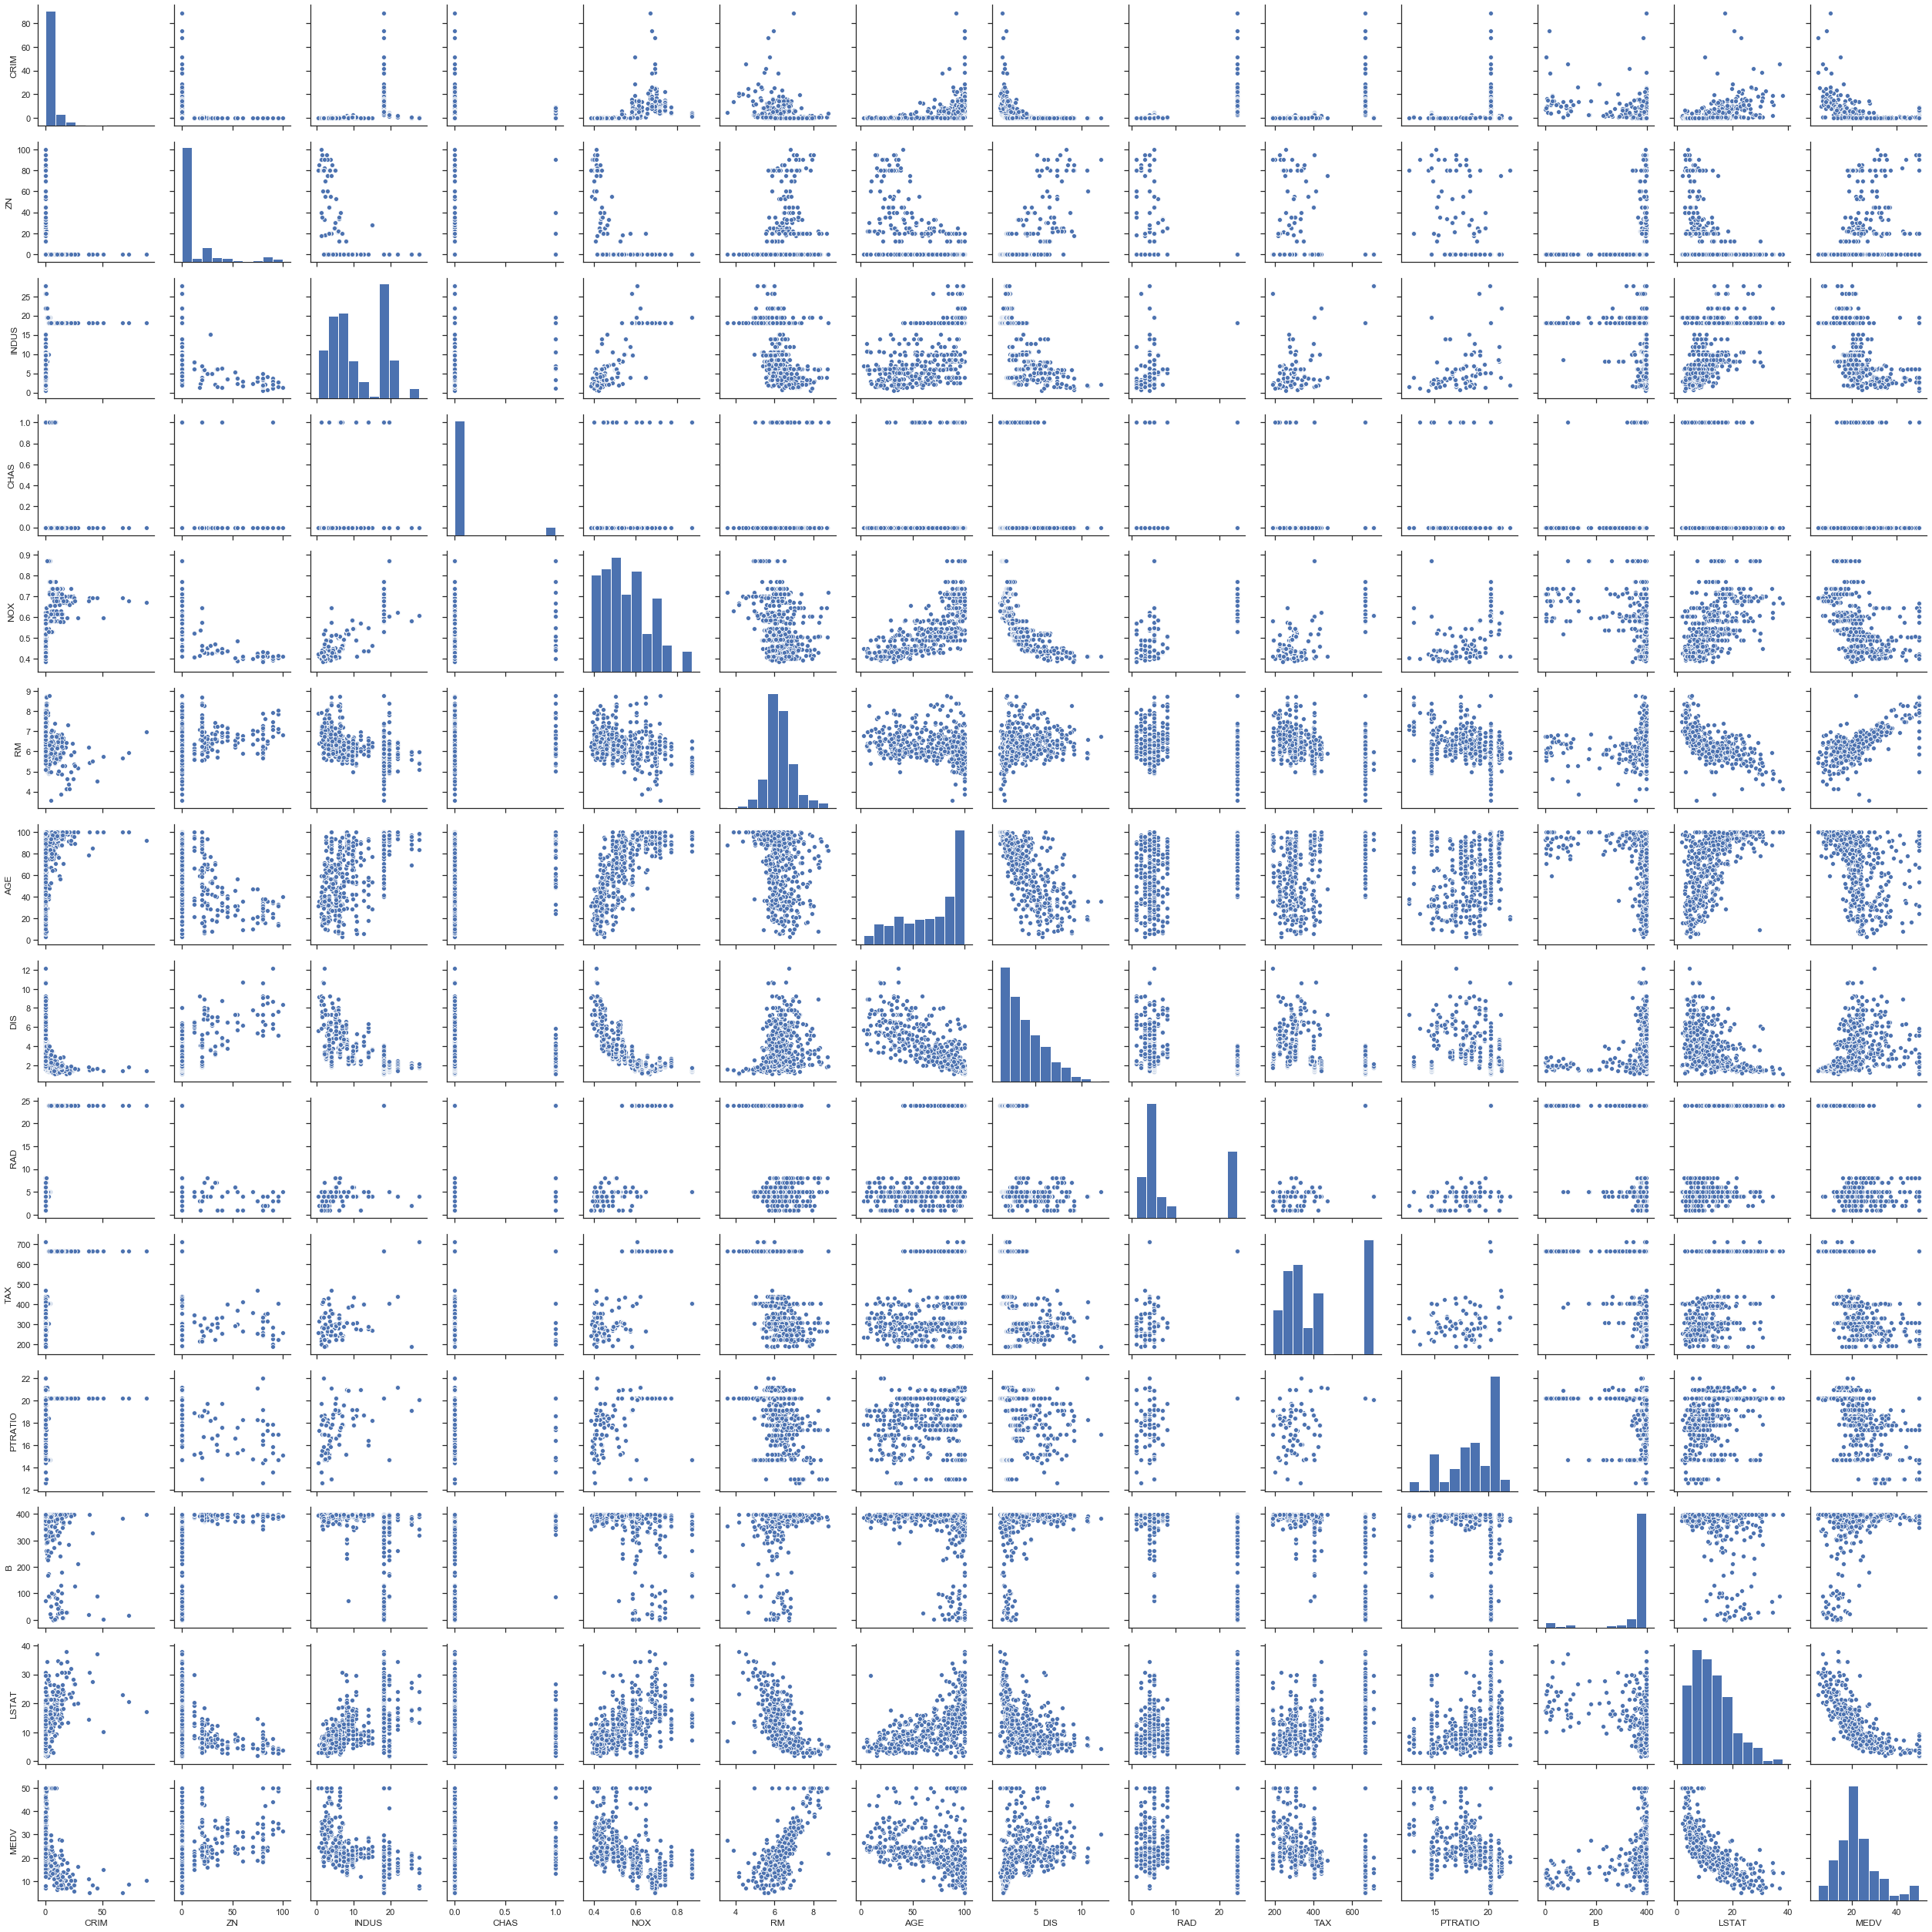

In [20]:
# график распределений попарно - точеные распределения
sns.pairplot(data)

Загрузить таблицу Happiness report. Нарисовать матрицу ковариаций попарно. 

In [21]:
url = "http://yustiks.ru/dataset/world-happiness-report-2019.csv"
data_hap = pd.read_csv(url)
data_hap.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


Сколько в данной таблице отсутствующих значений? Написать ответ. Если есть отсутствующие значения в выборке country, убрать (drop). Написать код.

In [22]:
data_hap['Country (region)'].isna().sum()

0

Отсутствующих значений в выборке Country - нет, все страны имеют названия.

In [23]:
data_hap.isna().sum()

Country (region)            0
Ladder                      0
SD of Ladder                0
Positive affect             1
Negative affect             1
Social support              1
Freedom                     1
Corruption                  8
Generosity                  1
Log of GDP\nper capita      4
Healthy life\nexpectancy    6
dtype: int64

Но в самой таблице Happiness report их много, больше всего в столбце Corruption - 8 значений.                  

Сколько стран в выборке? Написать ответ. Можно ли сказать, что данные значения - это **проблема классификации**?

In [24]:
len(data_hap['Country (region)'])

156

Всего в выборке **156** стран. Врядли можно назвать значения в столбеце Country (region) проблемой классификации. Если бы существовала классификация по региону, например, Америка, Африка, Ближний восток, Центральная Европа, то тогда возможно была бы проблема классификации или я не очень хорошо понял вопрос.  
В мире всего насчитывается 256 стран, зависимых территорий и непризнанных образований. Суверенных стран в мире насчитывается 206, причём признанных всеми странами мира из них - **190**, а признанных большинством стран - 198.

Нарисовать sns.pairplot для класс - страна. Из графика сделать вывод о том, какие страны похожи.  
*(в ноуутбуке, скаченном 22.09.2019, в тексте задания всё ещё стоит класс-страна)*

In [25]:
#Очищаем таблицу
clear_df = data_hap.dropna()

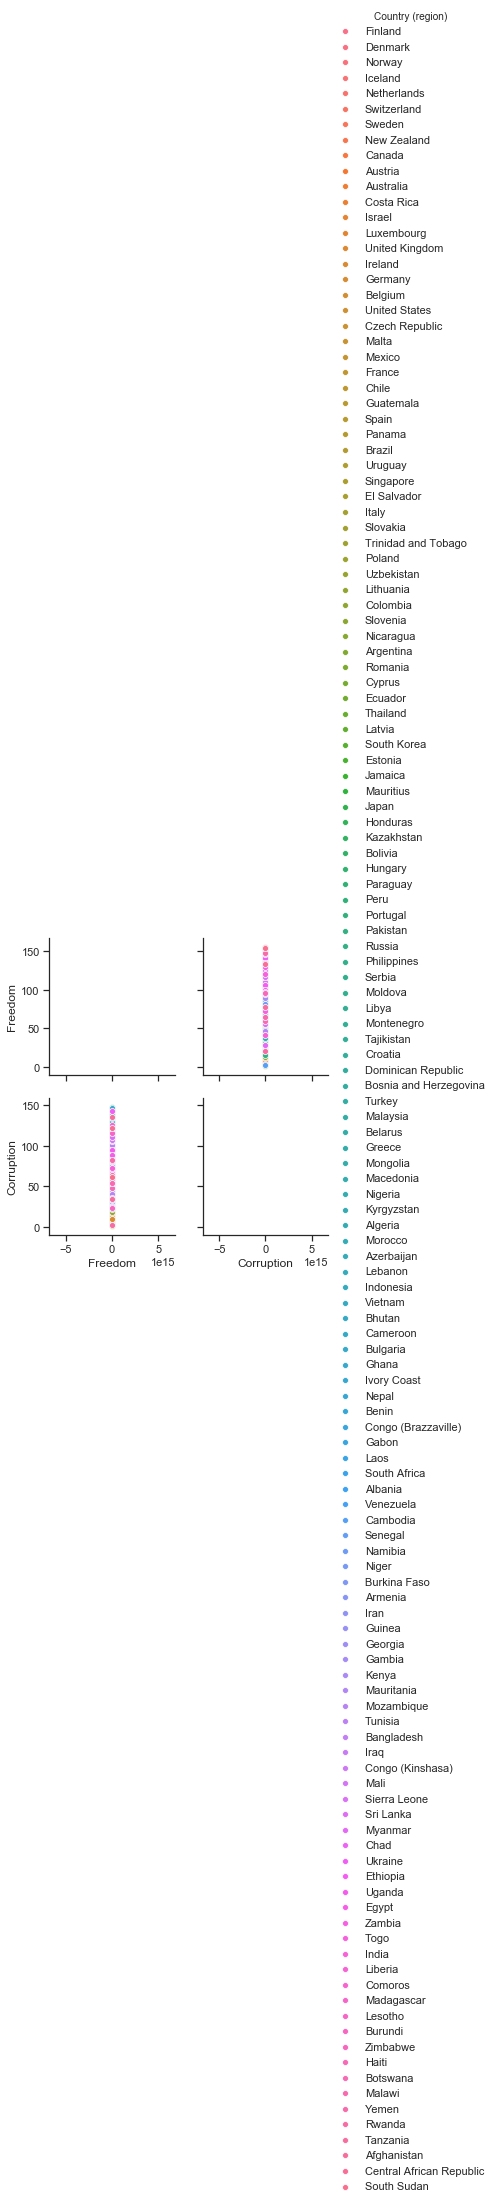

In [26]:
# Если код ниже не работает, измените код, используя материал лекций. 
# Пишите на почту, если испытываете проблемы: yustiks@gmail.com
sns.set(style = "ticks", color_codes = True)
clear_df_3col = clear_df[['Country (region)', 'Freedom', 'Corruption']]
fig = sns.pairplot(data = clear_df_3col, hue = 'Country (region)')
plt.show()

**Вывод:** стран слишком много, чтобы они были классами

Посчитать матрицу корреляций для таблицы. Написать код. Сделать график. Какие можно сделать выводы?

In [27]:
# Матрица корреляций
clear_df.corr()

,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
Ladder,1.000000,0.555987,0.511870,0.539677,0.833412,0.546414,0.224394,0.485704,0.820608,0.826677
SD of Ladder,0.555987,1.000000,0.090332,0.632734,0.600087,0.250246,0.253344,0.386337,0.663977,0.637554
Positive affect,0.511870,0.090332,1.000000,0.351906,0.433333,0.696567,0.225905,0.417061,0.310843,0.339032
Negative affect,0.539677,0.632734,0.351906,1.000000,0.671387,0.415935,0.166472,0.350541,0.565756,0.507148
Social support,0.833412,0.600087,0.433333,0.671387,1.000000,0.478613,0.148890,0.448135,0.801898,0.755292
Freedom,0.546414,0.250246,0.696567,0.415935,0.478613,1.000000,0.407571,0.498226,0.385919,0.423949
Corruption,0.224394,0.253344,0.225905,0.166472,0.148890,0.407571,1.000000,0.281146,0.186140,0.148973
Generosity,0.485704,0.386337,0.417061,0.350541,0.448135,0.498226,0.281146,1.000000,0.459762,0.453135
Log of GDP\nper capita,0.820608,0.663977,0.310843,0.565756,0.801898,0.385919,0.186140,0.459762,1.000000,0.873628
Healthy life\nexpectancy,0.826677,0.637554,0.339032,0.507148,0.755292,0.423949,0.148973,0.453135,0.873628,1.000000


**Вывод:** Один самых высоких значений коэффициента корреляций между показателем натурального логарифма ВВП на душу населения и показателем ожидаемой продолжительности жизни.

**Регрессионный анализ** - можно ли провести линейную зависимость между двумя выборками. Возьмем Ladder - удовлетворение жизнью, и generosity - доброта. Мы хотим найти прямую, которая разделит точки в пространстве наполовину. Это можно сделать графически. Нарисовать график. Можно ли сказать, что данная прямая является собственным вектором? При проецировании данных на эту прямую разброс данных максимален?

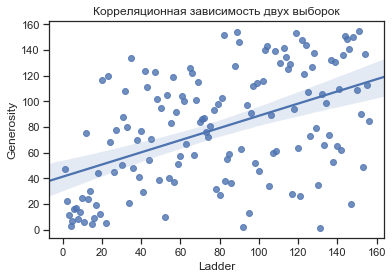

In [28]:
ladder = clear_df['Ladder']
generosity = clear_df['Generosity']
sns.regplot(x = ladder, y = generosity, data = clear_df, fit_reg = True)
plt.xlabel('Ladder')
plt.ylabel('Generosity')
plt.title('Корреляционная зависимость двух выборок')
plt.grid(False)
plt.show()

Я думаю можно сказать, что данная прямая является собственным вектором. При проецировании данных на эту прямую разброс данных максимален.

# Дискретное распределение случайной величины

Напишите код для моделирования 10 подбрасываний игрального кубика. Начертите диаграму histogram. Какое это распределение?

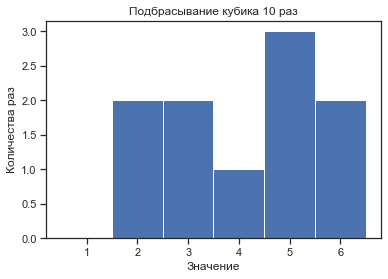

In [35]:
def cube(n):
    values = np.random.randint(1, 7, size=n)
    plt.hist(values, bins=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5], edgecolor='white')

    plt.xlabel('Значение')
    plt.ylabel('Количества раз')
    plt.title('Подбрасывание кубика ' + str(n) + ' раз')
    plt.show()

cube(10)

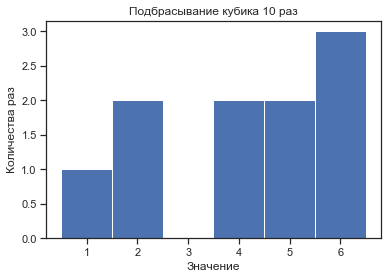

In [31]:
cube(10)

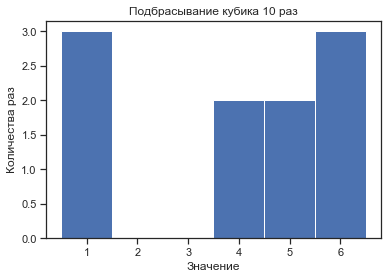

In [32]:
cube(10)

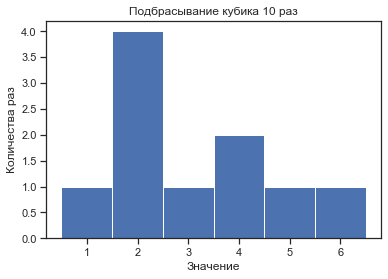

In [33]:
cube(10)

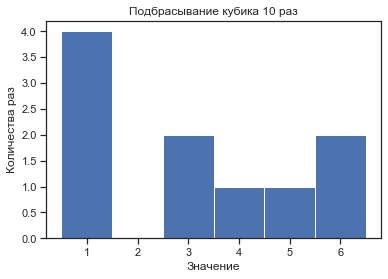

In [34]:
cube(10)

**Вывод:** анализируя 5 сетов по 10 испытаний сложно что-то сказать о характере распределения, каждый раз получается разный график.

Напишите код для моделирования 1000 подбрасываний игрального кубика. Начертите диаграму histogram. Почему график изменился? Как применить центральную предельную теорему?

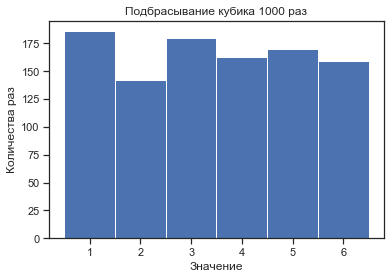

In [30]:
cube(1000)

**Вывод:** график стал ближе к графику дискретного равномерного распределения.